In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city =  pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(df_ride, df_city, on='city', how='outer')
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

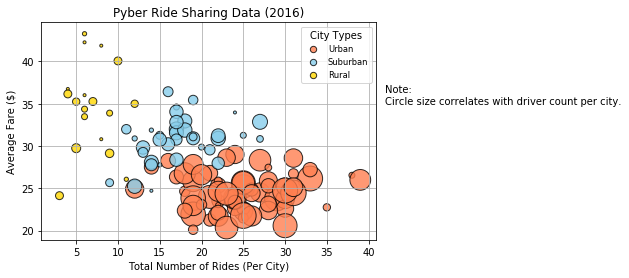

In [2]:
df_group_city = combined_df.groupby(["type","city"]).agg({"fare":['mean'], "ride_id":['count'], "driver_count":['mean']})

avg_fare_urban = df_group_city['fare','mean']["Urban"]
avg_fare_suburban = df_group_city['fare','mean']["Suburban"]
avg_fare_rural = df_group_city['fare','mean']["Rural"]

tot_ride_urban = df_group_city['ride_id','count']["Urban"]
tot_ride_suburban = df_group_city['ride_id','count']["Suburban"]
tot_ride_rural = df_group_city['ride_id','count']["Rural"]

tot_driver_urban = df_group_city['driver_count','mean']["Urban"]
tot_driver_suburban = df_group_city['driver_count','mean']["Suburban"]
tot_driver_rural = df_group_city['driver_count','mean']["Rural"]

# Obtain the x and y coordinates for each of the three city types


# Build the scatter plots for each city types
n = 9
plt.scatter(tot_ride_urban,avg_fare_urban, s = tot_driver_urban*n, color = 'Coral', edgecolors = 'black', alpha = .8, label = "Urban")
plt.scatter(tot_ride_suburban,avg_fare_suburban, s = tot_driver_suburban*n, color = 'SkyBlue', edgecolors = 'black', alpha = .8, label = "Suburban")
plt.scatter(tot_ride_rural,avg_fare_rural, s = tot_driver_rural*n, color = 'Gold', edgecolors = 'black', alpha = .8, label = "Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(loc = 'best', fontsize = 'small', title = "City Types")
[handle.set_sizes([40]) for handle in lgnd.legendHandles]

# Incorporate a text label regarding circle size
textstr = 'Note:\nCircle size correlates with driver count per city.'
plt.text(42, 35, textstr, fontsize=10)

# Save Figure
plt.savefig('pyber_bubble.png', bbox_inches = "tight")

# Show plot
plt.show()

## Total Fares by City Type

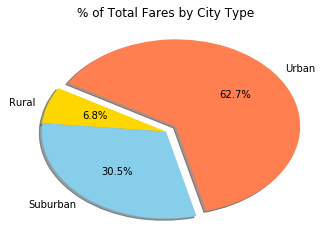

In [3]:
# Calculate Type Percents
df_type_fare = combined_df.groupby(["type"]).agg({"fare":['sum']})

members = df_type_fare['fare']
explode = (0, 0, 0.1)
city_type = df_type_fare.index.tolist()
colors = ["Gold", "SkyBlue", "Coral"]

# Build Pie Chart
fig, ax = plt.subplots()
plt.title("% of Total Fares by City Type")
ax.pie(members, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

ax.set_aspect(.70)

# Save Figure
plt.savefig('pyber_pie_fare.png', bbox_inches = "tight")

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

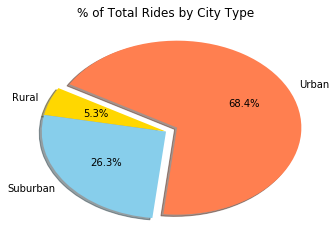

In [5]:
# Calculate Ride Percents
df_type_ride = combined_df.groupby(["type"]).agg({"ride_id":['count']})
members = df_type_ride['ride_id']

# Build Pie Chart
fig, ax = plt.subplots()
plt.title("% of Total Rides by City Type")
ax.pie(members, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

ax.set_aspect(.70)

# Save Figure
plt.savefig('pyber_pie_ride.png', bbox_inches = "tight")

In [6]:
# Show Figure
plt.show()

## Total Drivers by City Type

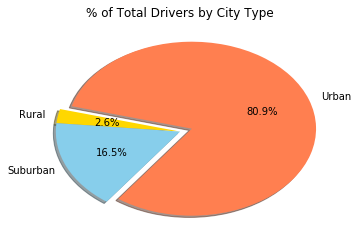

In [7]:
## Total Drivers by City Type ==============

# Calculate Driver Percents
members = [sum(tot_driver_rural), sum(tot_driver_suburban), sum(tot_driver_urban)]

# Build Pie Charts
fig, ax = plt.subplots()
plt.title("% of Total Drivers by City Type")
ax.pie(members, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=165)

ax.set_aspect(.70)

# Save Figure
plt.savefig('pyber_pie_driver.png', bbox_inches = "tight")

In [8]:
# Show Figure
plt.show()

In [9]:
#written description of three observable trends based on the data.
print("In larger populated areas, there are more drivers, more rides, and higher in total fares but lower fares on average.")


In larger populated areas, there are more drivers, more rides, and higher in total fares but lower fares on average.
